# Prompt

You will be working with scikit-image package in many future homeworks. I want you to start familiarizing yourself with it and related packages in case you haven’t used them before. The user guide for scikit-image is at https://scikit-image.org/docs/stable/user_guide.html. I recommend you reading it 
fully sooner or later.

For this homework:

1. Read the section on “Notes on the order of array dimensions” and run the example code using a (typically acceptable in a classroom/public setting) 4K image of your choice.

2. Use matplotlib to render the image you used in 1 in 3-D as in Figure 2.18a in the textbook. For more info see: https://matplotlib.org/stable/plot_types/index.html

3. Submit your python code, screenshot showing results after you run the code and the input image as s single zip file.

# Code

## Imports

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import requests
import time

from matplotlib import cm
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import axes3d
from skimage import io

## Get Image

In [2]:
# Image link
url = "https://images.alphacoders.com/642/642481.jpg"   # Grayscale skulls

# Download image
img = requests.get(url).content
with open("picture.jpg", "wb") as handler:
    handler.write(img)

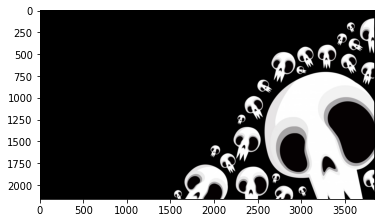

(2160, 3840, 3)


In [3]:
# View image
img = mpimg.imread("picture.jpg")
imgplot = plt.imshow(img)
plt.show()
print(img.shape)

In [4]:
# Load image using skimage.io
img = io.imread("picture.jpg")

## Run "Notes on the order of array dimensions" Example

In [5]:
# Example code
def in_order_multiply(arr, scalar):
    for plane in list(range(arr.shape[0])):
        arr[plane, :, :] *= scalar

def out_of_order_multiply(arr, scalar):
    for plane in list(range(arr.shape[2])):
        arr[:, :, plane] *= scalar

# rng = np.random.default_rng()
# im3d = rng.random((100, 1024, 1024))
t0 = time.time(); x = in_order_multiply(img, 5); t1 = time.time()
print("%.2f seconds" % (t1 - t0))  

s0 = time.time(); x = out_of_order_multiply(img, 5); s1 = time.time()
print("%.2f seconds" % (s1 - s0))  

print("Speedup: %.1fx" % ((s1 - s0) / (t1 - t0)))  

0.01 seconds
0.02 seconds
Speedup: 2.4x


## Render Image as 3D

### Get Image Values

In [6]:
# Get xy values
x = np.array([i for i in range(img.shape[1])])
y = np.array([i for i in range(img.shape[0])])

In [7]:
# Convert image to grayscale
img_g = io.imread("picture.jpg", as_gray=True)

In [8]:
# Convert data
X, Y = np.meshgrid(x, y)
Z = np.array(img_g)

In [ ]:
# Reverse Z values
m = Z.max()
Z_rev = np.array(Z)
for i, row in enumerate(Z):
    for j, col in enumerate(Z[i]):
        Z_rev[i, j] = m - col

### Wireframe

Reference: https://stackoverflow.com/questions/60590732/wireframing-from-an-image-using-matplotlib

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


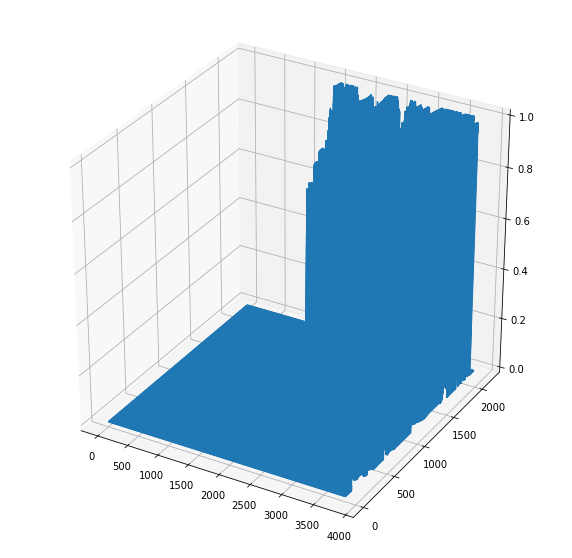

In [10]:
# Plot Z
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

rc = 5
ax.plot_wireframe(X, Y, Z, rstride=rc, cstride=rc)

plt.show()

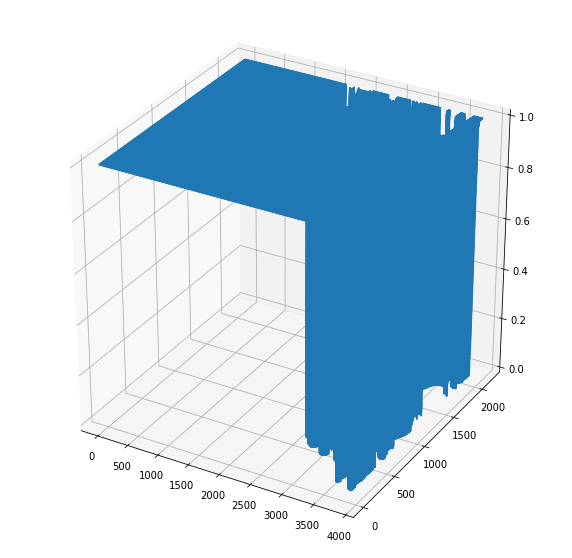

In [11]:
# Plot Z_rev
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X, Y, Z_rev, rstride=rc, cstride=rc)

plt.show()

### 3D Surface

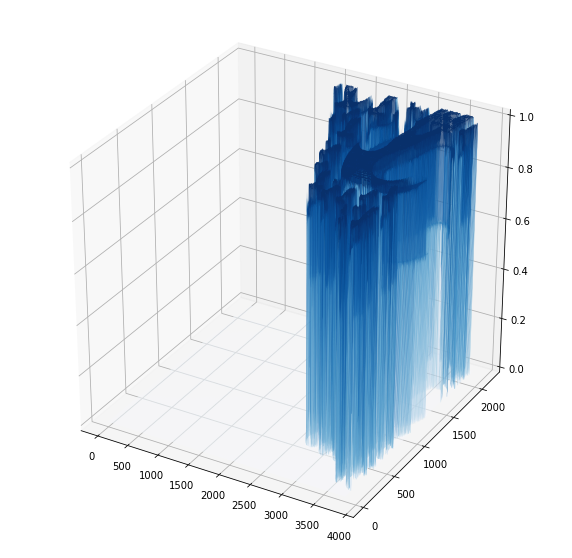

In [12]:
# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues, rstride=rc, cstride=rc)

plt.show()

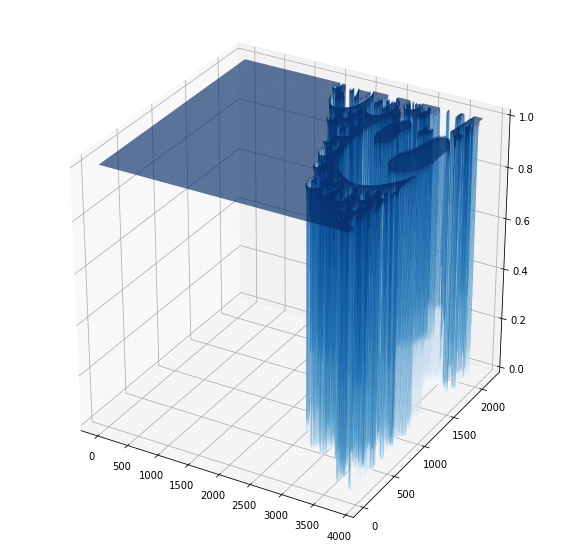

In [13]:
# Plot the surface reversed
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))
ax.plot_surface(X, Y, Z_rev, vmin=Z.min() * 2, cmap=cm.Blues, rstride=rc, cstride=rc)

plt.show()